In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
table = pd.read_csv('테이블.csv',encoding='euc-kr')

In [18]:
table.columns

Index(['행정구역', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세',
       '20세 미만', '80세 이상', '의사총수', '간호사총수', '입원실총수', '병상수총수'],
      dtype='object')

In [32]:
table['전체인구'] = table['20~29세']+table['30~39세']+table['40~49세']+table['50~59세']+table['60~69세']+table['70~79세']+table['20세 미만']+table['80세 이상']

In [55]:
table
table['노령인구 비율'] = (table['60~69세']+table['70~79세']+table['80세 이상'])/table['전체인구']

In [102]:
nurse = np.round(table['병상수총수']/table['간호사총수'],3)
doctor = np.round(table['병상수총수']/table['의사총수'],3)
old = np.round(table['노령인구 비율'],3)

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import operator

plt.xkcd()
korea=gpd.read_file('./skorea_provinces_geo.json')
#https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json
#위 주소에서 다운 가능함

In [76]:
#korea['name']=korea['name'].replace(['제주특별자치도','세종특별자치시','울산광역시','대전광역시','광주광역시','인천광역시',\
#                                     '대구광역시','부산광역시','서울특별시',],['제주도','세종시','울산시','대전시','광주시',\
#                                     '인천시','대구시','부산시','서울시'])

In [103]:
table.index.tolist

<bound method RangeIndex.tolist of RangeIndex(start=0, stop=17, step=1)>

In [104]:
votes_df=pd.DataFrame([table['행정구역'],old]).T
votes_df.rename(columns = {'Unnamed 0':'간호사1명당 병상수','행정구역':'name'}, inplace=True)
votes_df

,name,노령인구 비율
0,강원도,0.298
1,경기도,0.2
2,경상남도,0.253
3,경상북도,0.304
4,광주광역시,0.208
5,대구광역시,0.242
6,대전광역시,0.215
7,부산광역시,0.281
8,서울특별시,0.234
9,세종특별자치시,0.148


In [105]:
data_result=pd.merge(korea,votes_df,on='name')

In [106]:
data_result["sum"] = data_result["name"].map(str) +' : '+ (data_result["노령인구 비율"]).map(str) 
data_result.head()

,code,name,name_eng,base_year,geometry,노령인구 비율,sum
0,39,제주특별자치도,Jeju-do,2013,"MULTIPOLYGON (((126.27199 33.10916, 126.27157 ...",0.227,제주특별자치도 : 0.227
1,38,경상남도,Gyeongsangnam-do,2013,"MULTIPOLYGON (((128.18591 34.55402, 128.18583 ...",0.253,경상남도 : 0.253
2,37,경상북도,Gyeongsangbuk-do,2013,"MULTIPOLYGON (((129.47979 35.69403, 129.47966 ...",0.304,경상북도 : 0.304
3,36,전라남도,Jeollanam-do,2013,"MULTIPOLYGON (((126.93283 33.98397, 126.93536 ...",0.319,전라남도 : 0.319
4,35,전라북도,Jeollabuk-do,2013,"MULTIPOLYGON (((126.43034 35.44493, 126.43027 ...",0.294,전라북도 : 0.294


In [107]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.TTF").get_name() #혁님이 요청하신 'HY고딕' 입니다!
rc('font', family=font_name)

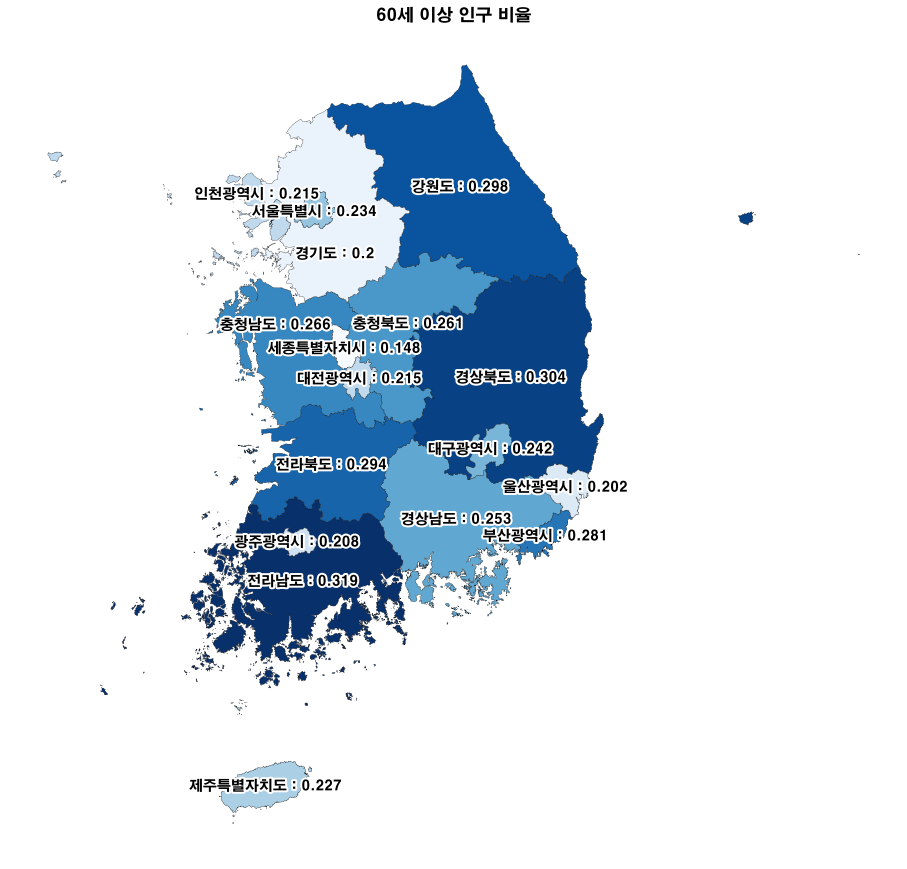

In [108]:
final_pic=data_result.plot( figsize=(16,16),linewidth=0.25, edgecolor='black', column='노령인구 비율',cmap='Blues')

for index,row in data_result.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    if row['name'] == '경기도':
        xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.3)))
    elif row['name'] == '인천광역시':
        xytext[0]=tuple(map(operator.add, xytext[0], (0.1,0.1)))
    elif row['name'] == '충청남도':
        xytext[0]=tuple(map(operator.add, xytext[0], (-0.2,0.2)))
    text=plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')
    plt.title('60세 이상 인구 비율')
    #text.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='red'))

plt.show()

In [127]:
price = pd.read_csv('비용합친거.csv',encoding='euc-kr')

In [128]:
price['평균비용'] = (price['최저비용']+price['최고비용'])/2

In [131]:
price.dropna(inplace=True)

In [132]:
price

,사업장명,시도명,의료인수,입원실수,병상수,진료과목내용명,의사총수,일반의의사수,인턴의사수,레지던트의사수,...,진료과목수,4항목합,진료합,진료과목수_전문의,사업장명.1,분류,명칭,최저비용,최고비용,평균비용
1,이화여자대학교의과대학부속서울병원,서울,796.0,303.0,653.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",182.0,1.0,0.0,0.0,...,25,182.0,181.0,25,이화여자대학교의과대학부속서울병원,상급병실료,1인실,310000.0,405000.0,357500.0
2,학교법인연세대학교의과대학세브란스병원,서울,4758.0,823.0,2455.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",1183.0,7.0,132.0,212.0,...,24,1179.0,828.0,25,학교법인연세대학교의과대학세브란스병원,상급병실료,1인실,104000.0,457000.0,280500.0
3,의료법인동신의료재단 동신병원,서울,112.0,59.0,207.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 비뇨의학과,...",21.0,3.0,0.0,0.0,...,11,21.0,18.0,10,의료법인동신의료재단 동신병원,상급병실료,1인실,200000.0,200000.0,200000.0
4,서울특별시서울의료원,서울,840.0,168.0,623.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",224.0,1.0,26.0,71.0,...,24,222.0,124.0,22,서울특별시서울의료원,상급병실료,1인실,218000.0,230000.0,224000.0
5,성애의료재단 성애병원,서울,336.0,85.0,275.0,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인...",83.0,2.0,7.0,11.0,...,23,83.0,63.0,19,성애의료재단 성애병원,상급병실료,1인실,170000.0,345000.0,257500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,의료법인풍산의료재단동부제일병원,충북,83.0,24.0,104.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 소아청소년과...",19.0,1.0,0.0,0.0,...,10,18.0,17.0,10,의료법인풍산의료재단동부제일병원,상급병실료,1인실,200000.0,200000.0,200000.0
348,의료법인 원광의료재단 원광종합병원,충북,34.0,61.0,252.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 소아청소년과, 영상의학...",16.0,0.0,0.0,0.0,...,11,17.0,17.0,12,의료법인 원광의료재단 원광종합병원,상급병실료,1인실,180000.0,180000.0,180000.0
349,의료법인명지의료재단명지병원,충북,123.0,40.0,176.0,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 소아청소년과...",34.0,2.0,0.0,0.0,...,15,34.0,32.0,14,의료법인명지의료재단명지병원,상급병실료,1인실,200000.0,200000.0,200000.0
351,의료법인 힐링의료재단 옥천성모병원,충북,53.0,47.0,164.0,"내과, 신경과, 외과, 정형외과, 마취통증의학과, 소아청소년과, 영상의학과, 진단검...",15.0,1.0,0.0,0.0,...,9,14.0,13.0,9,의료법인 힐링의료재단 옥천성모병원,상급병실료,1인실,150000.0,150000.0,150000.0


In [126]:
price['평균비용'].unique()

array([250000., 357500., 280500., 200000., 224000., 257500., 270000.,
       330000., 310000., 230000., 381000., 170000., 440500., 188800.,
       435000., 420000., 340000., 235680., 365000.,     nan, 240000.,
       210000., 195000., 350000., 150000., 190000., 300000., 140000.,
       180000., 127160., 360000., 225000., 415000., 295000., 550000.,
       340500., 229700., 255000., 285000., 145000., 260000., 400000.,
        90000., 110000., 227800., 160000., 120000., 284840., 265000.,
       223460., 310960., 376790., 410000., 165000., 313000., 284900.,
       144235., 124315., 393600., 435800., 235000., 395000., 450000.,
       457000., 235500., 155690., 264900., 275000., 125000., 166000.,
       115000., 155000., 135000., 205000., 255750., 282850., 175000.,
       158625., 185000., 215000., 117935., 151225., 220000., 231750.,
       280000., 100000., 153870., 312000.,  80000., 130000., 174900.,
       265500., 156000., 227500., 183000., 117500., 430000., 132500.,
       199240., 1125